<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/210425beer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www3.cuc.ac.jp/~nagaoka/2012/ouyou/08/beer/index.html より

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
 beer = pd.DataFrame({
    "date": ["2009/01", "2009/02", "2009/03", "2009/04", "2009/05", "2009/06", "2009/07", "2009/08", "2009/09", "2009/10", "2009/11", "2009/12", "2010/01", "2010/02", "2010/03", "2010/04", "2010/05", "2010/06", "2010/07", "2010/08", "2010/09", "2010/10", "2010/11", "2010/12"],
    "temperature": [6.8, 7.8, 10.0, 15.7, 20.1, 22.5, 26.3, 26.6, 23.0, 19.0, 13.5, 9.0, 7.0, 6.5, 9.1, 12.4, 19.0, 23.6, 28.0, 29.6, 25.1, 18.9, 13.5, 9.9],
    "sales volume": [5107, 7267, 8706, 10170, 9760, 12001, 12980, 11939, 9175, 9177, 9066, 15626, 4693, 6426, 8661, 9769, 8655, 12370, 12678, 11740, 9160, 8370, 9494, 14638]
})
beer

,date,temperature,sales volume
0,2009/01,6.8,5107
1,2009/02,7.8,7267
2,2009/03,10.0,8706
3,2009/04,15.7,10170
4,2009/05,20.1,9760
5,2009/06,22.5,12001
6,2009/07,26.3,12980
7,2009/08,26.6,11939
8,2009/09,23.0,9175
9,2009/10,19.0,9177


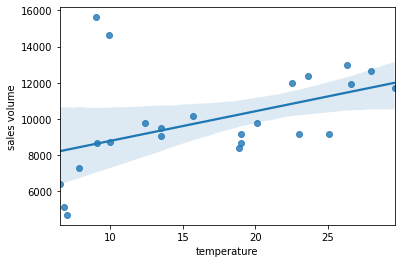

In [8]:
sns.regplot(x="temperature", y="sales volume", data=beer)

In [9]:
!wget https://atmos.washington.edu/~breth/classes/AS552/matlab/lect/carsmall.mat

--2021-04-25 04:55:40--  https://atmos.washington.edu/~breth/classes/AS552/matlab/lect/carsmall.mat
Resolving atmos.washington.edu (atmos.washington.edu)... 140.142.30.6
Connecting to atmos.washington.edu (atmos.washington.edu)|140.142.30.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3679 (3.6K)
Saving to: ‘carsmall.mat’

carsmall.mat        100%[===================>]   3.59K  --.-KB/s    in 0s      

2021-04-25 04:55:42 (196 MB/s) - ‘carsmall.mat’ saved [3679/3679]



In [10]:
from scipy.io import loadmat 

https://jp.mathworks.com/help/stats/regress.html
より2変数モデルの例


In [23]:
tmp = carsmall_mat["Horsepower"]

In [27]:
tmp.flatten()

array([130., 165., 150., 150., 140., 198., 220., 215., 225., 190., 115.,
       165., 153., 175., 175., 170., 160., 140., 150., 225.,  95.,  95.,
        97.,  85.,  88.,  46.,  87.,  90.,  95., 113.,  90., 215., 200.,
       210., 193.,  86.,  81.,  92.,  79.,  83., 140., 150., 120., 152.,
       100., 105.,  81.,  90.,  52.,  60.,  70.,  53., 100.,  78., 110.,
        95.,  71.,  70.,  75.,  72., 102., 150.,  88., 108., 120., 180.,
       145., 130., 150.,  88.,  88.,  88.,  85.,  84.,  90.,  92.,  nan,
        74.,  68.,  68.,  63.,  70.,  88.,  75.,  70.,  67.,  67.,  67.,
       110.,  85.,  92., 112.,  96.,  84.,  90.,  86.,  52.,  84.,  79.,
        82.])

In [31]:
carsmall_mat = loadmat("./carsmall.mat")
carsmall = pd.DataFrame({
    "Horsepower": carsmall_mat["Horsepower"].flatten(),
    "Weight": carsmall_mat["Weight"].flatten(),
    "MPG": carsmall_mat["MPG"].flatten()
}).dropna()

In [32]:
carsmall

,Horsepower,Weight,MPG
0,130.0,3504,18.0
1,165.0,3693,15.0
2,150.0,3436,18.0
3,150.0,3433,16.0
4,140.0,3449,17.0
...,...,...,...
95,86.0,2790,27.0
96,52.0,2130,44.0
97,84.0,2295,32.0
98,79.0,2625,28.0


In [35]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

In [60]:
y, X  =  dmatrices("MPG ~ Horsepower + Weight + Horsepower * Weight", data=carsmall, return_type="dataframe")

In [61]:
mod = sm.OLS(y, X)
res = mod.fit()

In [62]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           1.17e-28
Time:                        05:50:42   Log-Likelihood:                -256.57
No. Observations:                  93   AIC:                             521.1
Df Residuals:                      89   BIC:                             531.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            60.7104      4.691     12.942      0.000      51.390      70.031
Horsepower           -0.1882      0.053     -3.574      0.001      -0.293      -0.084
Weight               -0.0102      0.002     -6.430      0.000      -0.013      -0.007
Horsepower:Weight  3.849e-05    1.3e-05      2.953      0.004    1.26e-05    6.44e-05
==============================================================================
Omnibus:                       10.707   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               13.679
Skew:                           0.566   Prob(JB):                      0.00107
Kurtosis:                       4.500   Cond. No.                     4.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
res.params

Intercept            60.710361
Horsepower           -0.188206
Weight               -0.010154
Horsepower:Weight     0.000038
dtype: float64

In [78]:
res.params[0]

60.710360805026646

In [46]:
res.rsquared

0.7520529994716304

In [84]:
from itertools import product

In [89]:
xs = np.linspace(
    carsmall["Horsepower"].min(), 
    carsmall["Horsepower"].max(),
    100
)
ys = np.linspace(
    carsmall["Weight"].min(),
    carsmall["Weight"].max(),
    100
)
zs = np.array(
    [[
    res.params[0] + res.params[1] * x + res.params[2] * y + res.params[3] * x * y           
    for x in xs
 ] for y in ys])

In [98]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=carsmall["Horsepower"],
            y=carsmall["Weight"],
            z=carsmall["MPG"],
            marker=dict(size=3),
            mode="markers"
        ),
        go.Surface(x=xs, y=ys, z=zs, opacity=0.5)
    ]
)
fig.show()